In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
import pandas as pd
import requests
import glob

### Data Loading

In [6]:
df = pd.read_csv("paratransit_performance.csv")

In [7]:
df.shape

(198893, 8)

In [8]:
df.dtypes

,0
Date,object
Hour of Promise Time,float64
Provider Type,object
Arrival Time,object
Percentage of Trips by Arrival Time,object
Pickup Location,object
Total Appointment Trips,float64
Trips Within Arrival Time,float64


In [24]:
df.tail(20)

,Date,Hour of Promise Time,Provider Type,Arrival Time,Percentage of Trips by Arrival Time,Pickup Location,Total Appointment Trips,Trips Within Arrival Time,is_weekend
198873,2019-04-04,22.0,Primary,Over 45 mins early,NaN,Other,0.0,0.0,False
198874,2019-04-04,22.0,Primary,Over 1 minute late,0%,Queens,6.0,0.0,False
198875,2019-04-04,22.0,Primary,<1 minute late to 30 mins early (On-Time),67%,Queens,6.0,4.0,False
198876,2019-04-04,22.0,Primary,31 to 45 mins early,17%,Queens,6.0,1.0,False
198877,2019-04-04,22.0,Primary,Over 45 mins early,17%,Queens,6.0,1.0,False
198878,2019-04-04,22.0,Primary,Over 1 minute late,0%,Staten Island,1.0,0.0,False
198879,2019-04-04,22.0,Primary,<1 minute late to 30 mins early (On-Time),0%,Staten Island,1.0,0.0,False
198880,2019-04-04,22.0,Primary,31 to 45 mins early,100%,Staten Island,1.0,1.0,False
198881,2019-04-04,22.0,Primary,Over 45 mins early,0%,Staten Island,1.0,0.0,False
198882,2019-04-04,22.0,Broker,Over 1 minute late,0%,Bronx,1.0,0.0,False


In [99]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df_2020 = df[df['Date'].dt.year == 2020]

In [100]:
df_2020.head()

,Date,Hour of Promise Time,Provider Type,Arrival Time,Percentage of Trips by Arrival Time,Pickup Location,Total Appointment Trips,Trips Within Arrival Time,is_weekend,is_commute,time_of_day,is_late


In [93]:
df = df.dropna(subset=['Date'])

In [116]:
df_2019 = df.loc[lambda x: x['Date'].dt.year == 2019].copy()

In [117]:
df_2019.copy()

,Date,Hour of Promise Time,Provider Type,Arrival Time,Percentage of Trips by Arrival Time,Pickup Location,Total Appointment Trips,Trips Within Arrival Time,is_weekend,is_commute,time_of_day,is_late
121866,2019-01-01,0.0,Primary,Over 1 minute late,NaN,Bronx,0.0,0.0,False,False,night,late
121867,2019-01-01,0.0,Primary,<1 minute late to 30 mins early (On-Time),NaN,Bronx,0.0,0.0,False,False,night,on-time
121868,2019-01-01,0.0,Primary,31 to 45 mins early,NaN,Bronx,0.0,0.0,False,False,night,early
121869,2019-01-01,0.0,Primary,Over 45 mins early,NaN,Bronx,0.0,0.0,False,False,night,early
121870,2019-01-01,0.0,Primary,Over 1 minute late,0%,Brooklyn,1.0,0.0,False,False,night,late
...,...,...,...,...,...,...,...,...,...,...,...,...
198887,2019-04-04,22.0,Broker,<1 minute late to 30 mins early (On-Time),80%,Brooklyn,5.0,4.0,False,False,night,on-time
198888,2019-04-04,22.0,Broker,31 to 45 mins early,0%,Brooklyn,5.0,0.0,False,False,night,early
198889,2019-04-04,22.0,Broker,Over 45 mins early,20%,Brooklyn,5.0,1.0,False,False,night,early
198890,2019-04-04,22.0,Broker,Over 1 minute late,0%,Queens,1.0,0.0,False,False,night,late


In [118]:
df_2019['is_weekend'] = df['Date'].apply(lambda x: x.weekday() in [5,6])

In [119]:
df_2019['is_weekend'].value_counts(normalize=True)

,proportion
is_weekend,
False,0.723314
True,0.276686


In [120]:
#is the ride during commuting hours?
df_2019['is_commute'] = df_2019.apply(lambda x: (not x['is_weekend']) and ((7 <= x['Hour of Promise Time'] <= 8) or (17 <= x['Hour of Promise Time'] <= 18)), axis=1)
df_2019['is_commute'].value_counts(normalize=True)

,proportion
is_commute,
False,0.863059
True,0.136941


In [121]:
df_2019['time_of_day'] = df_2019['Hour of Promise Time'].apply( lambda x: 'morning' if 6 <= x < 12 else
                                                     'afternoon' if 12 <= x < 18 else
                                                      'evening' if 18 <= x < 21 else
                                                      'night')
df_2019['time_of_day'].value_counts(normalize=True)

,proportion
time_of_day,
night,0.297276
morning,0.286605
afternoon,0.285929
evening,0.130190


In [122]:
df_2019['is_late'] = df['Arrival Time'].apply(lambda x:
    'on-time' if isinstance(x, str) and x == '<1 minute late to 30 mins early (On-Time)' else
    'early' if isinstance(x, str) and 'early' in x else
    'late' if isinstance(x, str) and 'late' in x else
    'time unknown')
df_2019['is_late'].value_counts(normalize=True)

,proportion
is_late,
early,0.500000
late,0.250005
on-time,0.249995


In [124]:
# this is to just make sure we're doing this correctly
df_2019.sample(10)[['Date', 'Hour of Promise Time', 'is_weekend', 'is_commute', 'time_of_day', 'Arrival Time', 'is_late']]

,Date,Hour of Promise Time,is_weekend,is_commute,time_of_day,Arrival Time,is_late
133154,2019-01-14,16.0,False,False,afternoon,Over 1 minute late,late
195594,2019-04-01,5.0,False,False,night,Over 1 minute late,late
190312,2019-03-25,22.0,False,False,night,31 to 45 mins early,early
181930,2019-03-16,3.0,True,False,night,Over 1 minute late,late
151613,2019-02-08,3.0,False,False,night,Over 45 mins early,early
147130,2019-02-02,16.0,True,False,afternoon,Over 1 minute late,late
192907,2019-03-28,23.0,False,False,night,<1 minute late to 30 mins early (On-Time),on-time
139127,2019-01-22,3.0,False,False,night,<1 minute late to 30 mins early (On-Time),on-time
176469,2019-03-09,16.0,True,False,afternoon,Over 45 mins early,early
155115,2019-02-12,8.0,False,True,morning,<1 minute late to 30 mins early (On-Time),on-time


In [125]:
df_2019.shape

(77026, 12)

In [156]:
groupby = (
    df_2019
    .groupby('is_late')
    .pipe(lambda grp:
        pd.DataFrame({
            'total_rides': grp.size(),
            'weekend_rides': grp['is_weekend'].sum(),
            'commute_rides': grp['is_commute'].sum(),
            'morning_rides': grp['time_of_day'].apply(lambda x: (x == 'morning').sum()),
            'afternoon_rides': grp['time_of_day'].apply(lambda x: (x == 'afternoon').sum()),
            'evening_rides': grp['time_of_day'].apply(lambda x: (x == 'evening').sum()),
            'night_rides': grp['time_of_day'].apply(lambda x: (x == 'night').sum()),
            'bronx_rides': grp['Pickup Location'].apply(lambda x: (x == 'Bronx').sum()),
            'brooklyn_rides': grp['Pickup Location'].apply(lambda x: (x == 'Brooklyn').sum()),
            'staten_island_rides': grp['Pickup Location'].apply(lambda x: (x == 'Staten Island').sum()),
            'queens_rides': grp['Pickup Location'].apply(lambda x: (x == 'Queens').sum()),
            'manhattan_rides': grp['Pickup Location'].apply(lambda x: (x == 'Manhattan').sum())

        })
    )
    .assign(pct_weekend=lambda df: df.apply(lambda x: x['weekend_rides'] / x['total_rides'], axis=1))
    .assign(pct_commute=lambda df: df.apply(lambda x: x['commute_rides'] / x['total_rides'], axis=1))
    .assign(pct_brooklyn=lambda df: df.apply(lambda x: x['brooklyn_rides'] / x['total_rides'], axis=1))
    .assign(pct_morning=lambda df: df.apply(lambda x: x['morning_rides'] / x['total_rides'], axis=1)))

In [157]:
print(groupby)

         total_rides  weekend_rides  commute_rides  morning_rides  \
is_late                                                             
early          38512          10656           5274          11038   
late           19257           5328           2637           5519   
on-time        19257           5328           2637           5519   

         afternoon_rides  evening_rides  night_rides  bronx_rides  \
is_late                                                             
early              11012           5014        11448         7492   
late                5506           2507         5725         3746   
on-time             5506           2507         5725         3746   

         brooklyn_rides  staten_island_rides  queens_rides  manhattan_rides  \
is_late                                                                       
early              7982                 3994          7812             7428   
late               3991                 1997          3907             

In [ ]:
merged_station_trip_data.shape

(2197, 20)

In [185]:
df_2019['is_weekend'] = df_2019['is_weekend'].astype(int)
df_2019['is_commute'] = df_2019['is_commute'].astype(int)

In [189]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [193]:
df_2019['is_late'] = le.fit_transform(df_2019['is_late'])
df_2019['time_of_day'] = le.fit_transform(df_2019['time_of_day'])
df_2019['Pickup Location'] = le.fit_transform(df_2019['time_of_day'])

In [195]:
print(df_2019[['is_weekend', 'is_commute', 'is_late', 'time_of_day','Pickup Location']].head())

        is_weekend  is_commute  is_late  time_of_day  Pickup Location
121866           0           0        1            3                3
121867           0           0        2            3                3
121868           0           0        0            3                3
121869           0           0        0            3                3
121870           0           0        1            3                3


In [196]:
features = [
    'is_late',
    'is_weekend',
    'is_commute',
    'time_of_day',
    'Pickup Location',
]

In [197]:
inertias = []

In [198]:
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_2019[features])
    inertias.append(kmeans.inertia_)

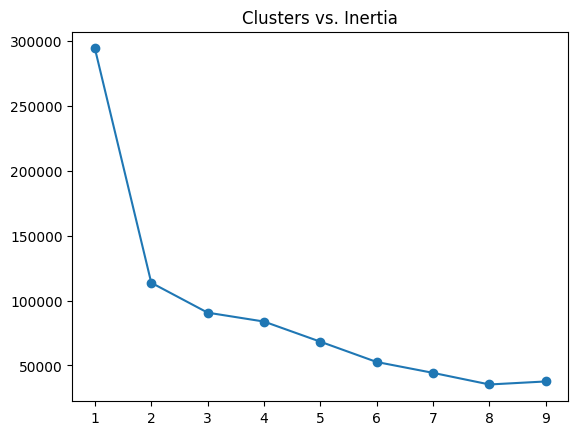

In [199]:
plt.plot(range(1,10), inertias, marker='o')
plt.title('Clusters vs. Inertia')
plt.show()

From the graph above it looks like either 5 or 6 would probably be a good number to use for our clusters. Let's try separating them into 6 clusters!

In [200]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(df_2019[features])

KMeans(n_clusters=7, random_state=42)

In [201]:
kmeans.labels_

array([4, 0, 6, ..., 6, 4, 0], dtype=int32)

In [202]:
df_2019['kmeans_label'] = kmeans.labels_

In [203]:
df_2019.head()

,Date,Hour of Promise Time,Provider Type,Arrival Time,Percentage of Trips by Arrival Time,Pickup Location,Total Appointment Trips,Trips Within Arrival Time,is_weekend,is_commute,time_of_day,is_late,kmeans_label
121866,2019-01-01,0.0,Primary,Over 1 minute late,NaN,3,0.0,0.0,0,0,3,1,4
121867,2019-01-01,0.0,Primary,<1 minute late to 30 mins early (On-Time),NaN,3,0.0,0.0,0,0,3,2,0
121868,2019-01-01,0.0,Primary,31 to 45 mins early,NaN,3,0.0,0.0,0,0,3,0,6
121869,2019-01-01,0.0,Primary,Over 45 mins early,NaN,3,0.0,0.0,0,0,3,0,6
121870,2019-01-01,0.0,Primary,Over 1 minute late,0%,3,1.0,0.0,0,0,3,1,4


In [204]:
df_2019['kmeans_label'].value_counts()

,count
kmeans_label,
1,22024
6,11448
5,11038
2,11038
3,10028
4,5725
0,5725


In [206]:
cluster_feature_averages = df_2019.groupby('kmeans_label')[features].mean().T

In [207]:
cluster_feature_averages

kmeans_label,0,1,2,3,4,5,6
is_late,2.000000,0.750000,0.000000,0.750000,1.000000,1.500000,0.000000
is_weekend,0.269869,0.279695,0.281210,0.275628,0.269869,0.281210,0.269916
is_commute,0.000000,0.119869,0.239717,0.260870,0.000000,0.239717,0.000000
time_of_day,3.000000,0.000000,2.000000,1.000000,3.000000,2.000000,3.000000
Pickup Location,3.000000,0.000000,2.000000,1.000000,3.000000,2.000000,3.000000


In [208]:
cluster_feature_averages['variance'] = cluster_feature_averages.apply(lambda x: x.var(), axis=1)
cluster_feature_averages.sort_values('variance', ascending=False)

kmeans_label,0,1,2,3,4,5,6,variance
time_of_day,3.000000,0.000000,2.000000,1.000000,3.000000,2.000000,3.000000,1.333333
Pickup Location,3.000000,0.000000,2.000000,1.000000,3.000000,2.000000,3.000000,1.333333
is_late,2.000000,0.750000,0.000000,0.750000,1.000000,1.500000,0.000000,0.538690
is_commute,0.000000,0.119869,0.239717,0.260870,0.000000,0.239717,0.000000,0.015275
is_weekend,0.269869,0.279695,0.281210,0.275628,0.269869,0.281210,0.269916,0.000030
